In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1)

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)


In [2]:
data = pd.read_csv('housing.csv')
data.head(10)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca
5,7046327064,https://reno.craigslist.org/apa/d/reno-walk-in...,reno / tahoe,https://reno.craigslist.org,1093,apartment,720,1,1.0,1,...,0,0,0,laundry in bldg,NaN,https://images.craigslist.org/00808_1EfWoZv4NX...,"1BD | 1BA | 720SQFTIn addition to attractive, ...",39.4572,-119.776,ca
6,7049020738,https://reno.craigslist.org/apa/d/1-bedroom-av...,reno / tahoe,https://reno.craigslist.org,935,apartment,661,1,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00C0C_i1DJWxfSZC...,Tucked away in a park-like setting on the edge...,39.5118,-119.802,ca
7,7049041899,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
8,7049041451,https://reno.craigslist.org/apa/d/sparks-bouti...,reno / tahoe,https://reno.craigslist.org,1525,apartment,1053,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00W0W_aMt5LvqkQh...,"BRAND NEW APARTMENT HOMES, NOW OPEN! **GET 1 ...",39.6185,-119.672,ca
9,7049041434,https://reno.craigslist.org/apa/d/reno-6850-sh...,reno / tahoe,https://reno.craigslist.org,1295,condo,930,2,2.0,0,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01313_8AoC9NJZWA...,6850 Sharlands Ave E-1021 Reno NV 89523 ...,39.5193,-119.897,ca


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [4]:
#Data Summary
print("The total number of data: ", data.shape[0]*data.shape[1])
print("The total number of null values: {} and it occupies {:.2f}% of the total ".format(data.isnull().sum().sum(), (data.isnull().sum().sum()*100)/(data.shape[0]*data.shape[1])))
print("The number of ID: {} ".format(data['id'].nunique()))
print("The average price of housing: {:.2f}$ ".format(data['price'].mean()))

The total number of data:  8469494
The total number of null values: 223551 and it occupies 2.64% of the total 
The number of ID: 384977 
The average price of housing: 8825.72$ 


In [5]:
data.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

<AxesSubplot:>

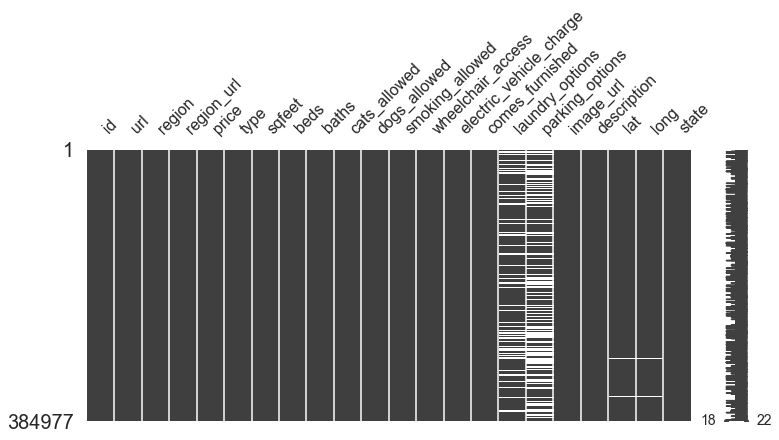

In [6]:
import missingno
missingno.matrix(data, figsize=(12,5))


In [7]:
#preprocess the NaN values.
data.fillna({'laundry_options' : 0}, inplace = True)
data.fillna({'parking_options' : 0}, inplace = True)
data.fillna({'lat' : 0}, inplace = True)
data.fillna({'long' : 0}, inplace = True)

In [8]:
data.drop(columns=["url", "region_url", "image_url", "description"],axis=1,inplace=True)

In [9]:
#Check if there is duplicated columns.
data.duplicated().sum()

0

In [10]:
# Remove all the duplicates
data.drop_duplicates(inplace = True)

In [11]:
# Check if there is data that the price is 0.
len(data[data['price'] == 0])

1307

In [12]:
data['price'].sort_values(ascending = False)

74809     2768307249
372726      21701907
211107      18502000
211106      18502000
37586       12000000
             ...    
369173             0
369148             0
369146             0
340072             0
278300             0
Name: price, Length: 384977, dtype: int64

## EDA & Visualization

(-0.5, 2000.0)

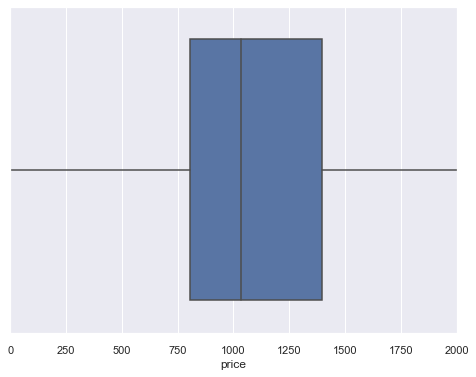

In [13]:
# The distribution of price in this dataset.
f, ax = plt.subplots(1,1, figsize=(8,6))

#sns.distplot(data['price'], hist= True, ax=ax)
sns.boxplot(data['price'], showfliers = True, ax=ax)
#adjust the range of x-axis since the data seems to be skewed to one side.
ax.set_xlim(-0.5, 2000)

In [14]:
# Skewness and Kurtosis!
# Skewness: a measure of the asymmetry of a distribution
# -3 < skewness < 3 >> normal!
# Kurtosis: a measure of the combined weight of a distribution's tails relative to the center of the distribution.
# The kurtosis of Normal distribution: 0
print("Skewness: %.2f" % data['price'].skew())
print("Kurtosis: %.2f" % data['price'].kurt())

Skewness: 620.24
Kurtosis: 384791.33


<AxesSubplot:xlabel='price'>

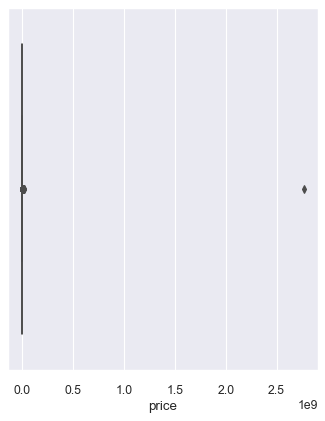

In [15]:
# Identify the distribution of price by using box plot.

f, ax = plt.subplots(1,1, figsize=(5,6), dpi=80)

#box plot
sns.boxplot(data['price'], showfliers = True, ax=ax)
#There are some outliers hence we should be careful to analyze the data.

Text(0.5, 1.0, 'Correlation map for Housing Data')

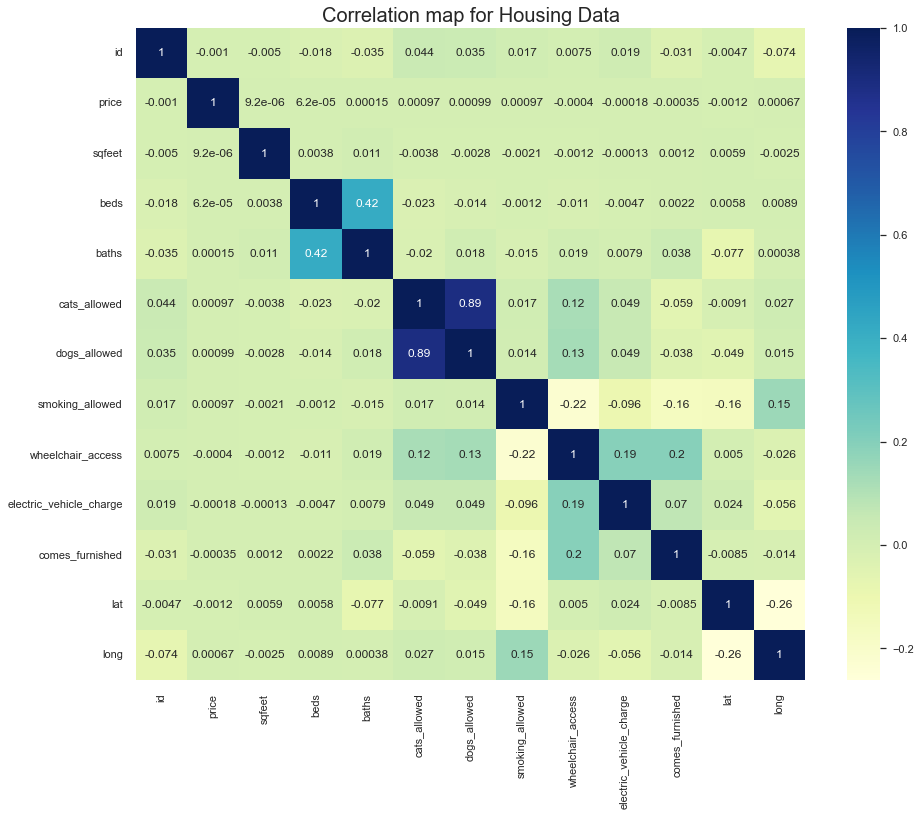

In [16]:
#Identify the correlation of the each columns by HEATMAP.
f, ax = plt.subplots(1,1, figsize=(15,12))

corrmat = data.corr()
sns.heatmap(corrmat, annot = True, cmap = 'YlGnBu', ax=ax)
plt.title("Correlation map for Housing Data", size = 20)


### 4-2. Remove the outliers with setting threshold in price.

In [17]:
min_threshold, max_threshold = data['price'].quantile([0.01,0.99])
min_threshold, max_threshold

(344.0, 3395.0)

In [18]:
data[data['price'] < min_threshold]
# Less than min_threshold: 3849 observations

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
4,7049043759,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,0,39.5357,-119.805,ca
72,7047408531,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,0,0,39.5357,-119.805,ca
120,7048745427,reno / tahoe,274,apartment,220,0,1.0,0,0,0,0,0,1,laundry on site,no parking,39.5268,-119.811,ca
144,7047403946,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,0,39.5357,-119.805,ca
178,7048706829,reno / tahoe,274,apartment,220,0,1.0,0,0,0,0,0,1,laundry on site,no parking,39.5263,-119.813,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384942,7049069619,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,0,39.5483,-119.796,ca
384943,7049064237,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,0,39.5357,-119.805,ca
384946,7049062904,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,0,39.5357,-119.805,ca
384954,7047399414,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,0,39.5357,-119.805,ca


In [19]:
data[data['price'] > max_threshold]
# greater than max_threshold: 3834 observations

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
90,7048942191,reno / tahoe,3900,apartment,3300,4,3.0,1,1,1,0,0,1,0,0,39.5612,-119.684,ca
517,7040512534,reno / tahoe,4000,condo,1344,3,3.0,0,1,0,0,0,1,w/d in unit,off-street parking,39.2637,-119.948,ca
1266,7045834019,reno / tahoe,3900,house,3744,4,4.5,1,1,0,0,0,0,w/d in unit,attached garage,39.2669,-119.817,ca
1302,7047179004,san diego,3995,house,2700,3,3.0,0,0,0,0,0,0,w/d in unit,attached garage,33.1056,-117.286,ca
1563,7049927379,sacramento,4300,apartment,1522,2,2.0,1,1,0,1,1,1,w/d in unit,detached garage,38.5714,-121.488,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384010,7038262809,redding,10000,house,7800,5,6.5,0,0,1,0,0,0,laundry in bldg,attached garage,40.5802,-122.362,ca
384037,7039606088,redding,3800,house,3200,3,3.0,0,0,1,0,0,0,w/d hookups,attached garage,40.6723,-122.327,ca
384058,7033617230,redding,3500,house,5000,5,3.0,1,1,1,0,0,0,0,attached garage,40.5787,-123.178,ca
384119,7046747248,redding,7685,house,2000,4,2.0,0,0,0,1,0,1,w/d in unit,attached garage,40.5696,-122.435,ca


In [20]:
data_thr = data[(data['price'] > min_threshold) & (data['price'] < max_threshold)]
data_thr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377264 entries, 0 to 384976
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       377264 non-null  int64  
 1   region                   377264 non-null  object 
 2   price                    377264 non-null  int64  
 3   type                     377264 non-null  object 
 4   sqfeet                   377264 non-null  int64  
 5   beds                     377264 non-null  int64  
 6   baths                    377264 non-null  float64
 7   cats_allowed             377264 non-null  int64  
 8   dogs_allowed             377264 non-null  int64  
 9   smoking_allowed          377264 non-null  int64  
 10  wheelchair_access        377264 non-null  int64  
 11  electric_vehicle_charge  377264 non-null  int64  
 12  comes_furnished          377264 non-null  int64  
 13  laundry_options          377264 non-null  object 
 14  park

<AxesSubplot:xlabel='price', ylabel='Density'>

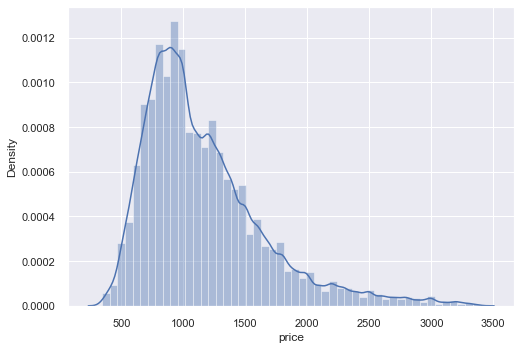

In [21]:
# Check the changed price's distribution.
sns.distplot(data_thr['price'])

In [22]:
print("Skewness: %.2f " % data_thr['price'].skew())
print("Kurtosis: %.2f " % data_thr['price'].kurt())

Skewness: 1.37 
Kurtosis: 2.27 


<AxesSubplot:xlabel='price'>

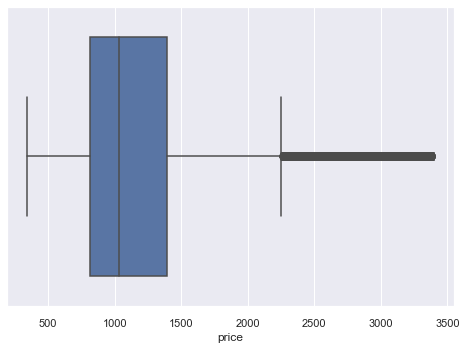

In [23]:
sns.boxplot(data_thr['price'])

### 4-3. The most listed housing type

In [24]:
data_thr.head()

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
5,7046327064,reno / tahoe,1093,apartment,720,1,1.0,1,1,1,0,0,0,laundry in bldg,0,39.4572,-119.776,ca


In [25]:
housing = data_thr.type.value_counts().head()
housing
# The apartment was the most listed type.

apartment    313000
house         31701
townhouse     15609
condo          5855
duplex         4967
Name: type, dtype: int64

In [26]:
housing2 = pd.DataFrame(housing)
housing2.reset_index(inplace = True)
housing2.rename(columns = {"index" : "type", "type" : "counts"}, inplace = True)
housing2

,type,counts
0,apartment,313000
1,house,31701
2,townhouse,15609
3,condo,5855
4,duplex,4967


[Text(0, 0, 'apartment'),
 Text(1, 0, 'house'),
 Text(2, 0, 'townhouse'),
 Text(3, 0, 'condo'),
 Text(4, 0, 'duplex')]

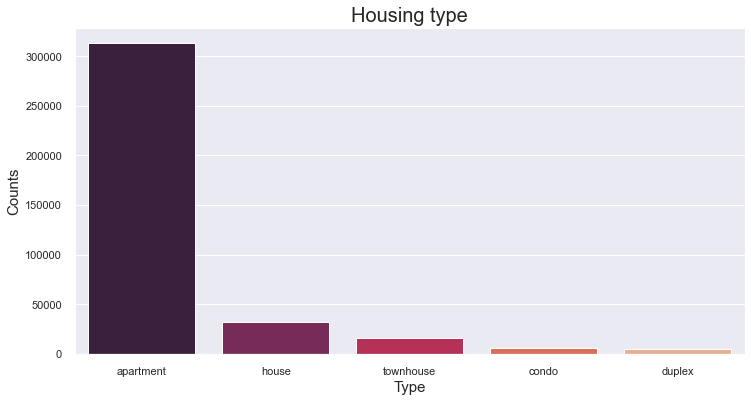

In [27]:
# Represent it as a bar graph

f, ax = plt.subplots(1,1, figsize=(12,6))

sns.barplot(data = housing2, x = 'type', y = 'counts', palette='rocket', ax=ax)
ax.set_title('Housing type', size=20)
ax.set_xlabel('Type', size=15)
ax.set_ylabel('Counts', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

### 4-4. What is the most expensive housing? and the cheapest one?

In [28]:
data_thr['state'].unique()

array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md', 'ma', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'az', 'ak', 'ar'], dtype=object)

In [29]:
#idxmax: print out the maximum index
data_thr.groupby(['state'])['price'].idxmax()

state
ak    355317
al    353182
ar    365729
az    360424
ca    377188
co     22449
ct     29883
dc     31408
de     34154
fl     57509
ga     68971
hi     81458
ia    106929
id     82680
il     90331
in     97356
ks    116056
ky    119798
la    107339
ma    139607
md    135173
me    131219
mi    145296
mn    162004
mo    173159
ms    169510
mt    174533
nc    190680
nd    221258
ne    195925
nh    217398
nj    202023
nm    206853
nv    196918
ny    213022
oh    227295
ok    236131
or    245631
pa    254502
ri    259354
sc    261239
sd    272007
tn    276043
tx    288471
ut    320701
va    322331
vt    320970
wa    335489
wi    342960
wv    339878
wy    346682
Name: price, dtype: int64

In [30]:
# What is the most expensive room according to 'state'?
data_thr.loc[data_thr.groupby(['state'])['price'].idxmax()][['id','price','region','state','sqfeet','beds','baths']]

,id,price,region,state,sqfeet,beds,baths
355317,7042170439,3300,anchorage / mat-su,ak,1800,2,2.0
353182,7032245612,3250,mobile,al,1912,4,4.5
365729,7036640132,3250,little rock,ar,2000,2,0.0
360424,7049621736,3333,phoenix,az,2353,3,3.0
377188,7049912465,3394,los angeles,ca,1505,3,2.0
22449,7049639780,3370,denver,co,1260,2,2.0
29883,7017302087,3300,new haven,ct,1800,5,2.0
31408,7039354437,3390,"washington, DC",dc,760,1,1.0
34154,7032255419,2941,delaware,de,2421,2,2.0
57509,7035155005,3384,south florida,fl,1310,2,2.0


In [31]:
#idxmin: print out the minimum index
data_thr.groupby(['state'])['price'].idxmin()

state
ak    357138
al    346948
ar    365228
az    363996
ca    384481
co     26560
ct     28207
dc     32058
de     33175
fl     41488
ga     74461
hi     82283
ia    103699
id     84275
il     91906
in    103024
ks    112680
ky    123970
la    126429
ma    140828
md    137844
me    131440
mi    153510
mn    159709
mo    173197
ms    170460
mt    174172
nc    177604
nd    220331
ne    195149
nh    217228
nj    201766
nm    207200
nv    198183
ny    210148
oh    228727
ok    235883
or    223010
pa    249272
ri    260806
sc    267068
sd    271387
tn    277199
tx    302665
ut    316825
va    322495
vt    320949
wa    335304
wi    340285
wv    339318
wy    346666
Name: price, dtype: int64

In [32]:
# What is the most cheapest room according to 'state'?
data_thr.loc[data_thr.groupby(['state'])['price'].idxmin()][['id','price','region','state','sqfeet','beds','baths']]


,id,price,region,state,sqfeet,beds,baths
357138,7007887835,345,fairbanks,ak,450,1,1.0
346948,7040328630,349,auburn,al,1214,4,2.0
365228,7049062104,350,jonesboro,ar,615,1,1.0
363996,7041221122,350,yuma,az,160,1,1.0
384481,7049805764,345,reno / tahoe,ca,450,1,1.0
26560,7029287110,400,western slope,co,300,1,1.0
28207,7039963004,376,hartford,ct,2160,3,2.0
32058,7035738734,520,"washington, DC",dc,725,3,3.0
33175,7044531963,500,delaware,de,810,2,1.0
41488,7010027071,350,gainesville,fl,1164,4,1.5


## Linear Regression 

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [34]:
data_thr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377264 entries, 0 to 384976
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       377264 non-null  int64  
 1   region                   377264 non-null  object 
 2   price                    377264 non-null  int64  
 3   type                     377264 non-null  object 
 4   sqfeet                   377264 non-null  int64  
 5   beds                     377264 non-null  int64  
 6   baths                    377264 non-null  float64
 7   cats_allowed             377264 non-null  int64  
 8   dogs_allowed             377264 non-null  int64  
 9   smoking_allowed          377264 non-null  int64  
 10  wheelchair_access        377264 non-null  int64  
 11  electric_vehicle_charge  377264 non-null  int64  
 12  comes_furnished          377264 non-null  int64  
 13  laundry_options          377264 non-null  object 
 14  park

In [35]:
# Both two columns have '0' values hence we need to convert these columns as string type to do LabelEncoding.
data_thr['laundry_options'] = str(data_thr['laundry_options'])
data_thr['parking_options'] = str(data_thr['parking_options'])

C:\Users\hyung\AppData\Local\Temp\ipykernel_20044\4014087288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_thr['laundry_options'] = str(data_thr['laundry_options'])
C:\Users\hyung\AppData\Local\Temp\ipykernel_20044\4014087288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_thr['parking_options'] = str(data_thr['parking_options'])


In [36]:
# let's transform the categorical vairabels by LabelEncoder!
le = LabelEncoder()
data_thr['region'] = le.fit_transform(data_thr['region'])
data_thr['type'] = le.fit_transform(data_thr['type'])
data_thr['laundry_options'] = le.fit_transform(data_thr['laundry_options'])
data_thr['parking_options'] = le.fit_transform(data_thr['parking_options'])
data_thr['state'] = le.fit_transform(data_thr['state'])

C:\Users\hyung\AppData\Local\Temp\ipykernel_20044\2443997255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_thr['region'] = le.fit_transform(data_thr['region'])
C:\Users\hyung\AppData\Local\Temp\ipykernel_20044\2443997255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_thr['type'] = le.fit_transform(data_thr['type'])
C:\Users\hyung\AppData\Local\Temp\ipykernel_20044\2443997255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [37]:
# Explanatory variables, "region" is almost same as "state" hence drop the "region" and keep the "state" 
X = data_thr.drop(["id", "price", "region"], axis = 1)
# Target Variable
y = data_thr['price']

In [38]:
# Split the dataset into 7:3 ratio as train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(264084, 15) (113180, 15) (264084,) (113180,)


In [39]:
# Model Evaluation
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_r2=metrics.r2_score(y_test, y_pred)
lr_MSE=metrics.mean_squared_error(y_test, y_pred)
lr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [40]:
#Check the results.
print("Accuracy on test set: {}".format(lr.score(X_test, y_test)))

Accuracy on test set: 0.14244202467895528


In [41]:
print('R^2:',lr_r2)
print('Adjusted R^2:', 1 - (1-lr_r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MSE:',lr_MSE)
print('RMSE:',lr_RMSE)

R^2: 0.14244202467895528
Adjusted R^2: 0.1423933123411112
MSE: 207474.58863522994
RMSE: 455.49378550670696


In [ ]:
## Ridge Regression

## XGB Regressor 

In [42]:
!pip install xgboost

In [43]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_r2 = metrics.r2_score(y_test, y_pred)
xgb_MSE = metrics.mean_squared_error(y_test, y_pred)
xgb_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [44]:
print('R^2:',xgb_r2)
print('Adjusted R^2:',1 - (1-xgb_r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MSE:',xgb_MSE)
print('RMSE:',xgb_RMSE)

R^2: 0.8058623041125212
Adjusted R^2: 0.8058512764020894
MSE: 46968.99772609179
RMSE: 216.72332067890568


## Gradient Boosting Regressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train,y_train)
y_pred= gbr.predict(X_test)
gbr_r2=metrics.r2_score(y_test, y_pred)
gbr_MSE=metrics.mean_squared_error(y_test, y_pred)
gbr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [46]:
print("R^2 Score:", gbr_r2)
print("MSE Score:", gbr_MSE)
print("RMSE Score:", gbr_RMSE)

R^2 Score: 0.6010945182642199
MSE Score: 96509.80237981606
RMSE Score: 310.66026842809504


## Random Rorest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
ran=RandomForestRegressor()
ran.fit(X_train, y_train)
y_pred= ran.predict(X_test)
ran_r2=metrics.r2_score(y_test, y_pred)
ran_MSE=metrics.mean_squared_error(y_test, y_pred)
ran_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [48]:
print("R^2 Score:", ran_r2)
print("MSE Score:", ran_MSE)
print("RMSE Score:", ran_RMSE)

R^2 Score: 0.8884581963350507
MSE Score: 26986.035343386793
RMSE Score: 164.27426865880972


## Model Comparison

In [49]:
models={"LR":[lr_r2, lr_MSE , lr_RMSE],
       "XGB":[xgb_r2, xgb_MSE, xgb_RMSE],
       "GBR":[gbr_r2, gbr_MSE , gbr_RMSE],
       "RAN":[ran_r2, ran_MSE , ran_RMSE],}
models=pd.DataFrame(models)
models=models.rename(index={0:"R^2", 1:"MSE", 2:"RMSE"})

In [50]:
models

,LR,XGB,GBR,RAN
R^2,0.142442,0.805862,0.601095,0.888458
MSE,207474.588635,46968.997726,96509.802380,26986.035343
RMSE,455.493786,216.723321,310.660268,164.274269
